In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [10]:
ATP_color = '#332288'
dATP_color = '#44AA99'

In [15]:
# Function to calculate the weighted average of the binding rates based on the cluster frequencies 
# and the binding curves 

def calc_wa(input_array, input_weights):

    x_min = 0 # max(input_array[:,0,0])
    x_max = 150
    n = 1000
    x = np.linspace(x_min, x_max, n)
    wa = np.zeros(len(x))
    for i in range(input_array.shape[0]):
        wa = wa + np.interp(x, np.concatenate(([0],input_array[i,:,0])), np.concatenate(([0],input_array[i,:,2])))*input_weights[i]
    return x, wa



In [21]:
# Read in the cluster frequencies of the two clusters 

ATP_cluster_df = pd.read_csv('/home/marcus/Documents/SERCA/serca-atp-datp/simulation_structures/stripped_trajectories/human_ATP/30_cnumvtime.dat',
                            delim_whitespace = True)

dATP_cluster_df = pd.read_csv('/home/marcus/Documents/SERCA/serca-atp-datp/simulation_structures/stripped_trajectories/human_dATP/30_cnumvtime.dat',
                            delim_whitespace = True)

ATP_weights = ATP_cluster_df.C1.value_counts()/len(ATP_cluster_df)
dATP_weights = dATP_cluster_df.C1.value_counts()/len(dATP_cluster_df)



### Site I

In [29]:
ATP_site_I_results_list = []
for i in range(30):
    a = np.loadtxt('/home/marcus/Documents/SERCA/serca-atp-datp/ca_bd/human_ATP_site_I/directory_{}/output_rates.txt'.format(i))
    ATP_site_I_results_list.append(a)
    
ATP_s1_x_range, ATP_s1_wa = calc_wa(np.array(ATP_site_I_results_list), ATP_weights)

save_name = input('Enter a filename (without extension) to save: ')
np.savetxt(save_name+'.csv', np.array((ATP_s1_x_range,ATP_s1_wa)).T)
print('Saved array ATP_s1_wa as {}'.format(save_name+'.csv'))

Enter a filename (without extension) to save: ATP_site_I
Saved array ATP_s1_wa as ATP_site_I.csv


In [34]:
dATP_site_I_results_list = []
for i in range(30):
    a = np.loadtxt('/home/marcus/Documents/SERCA/serca-atp-datp/ca_bd/human_dATP_site_I/directory_{}/output_rates.txt'.format(i))
    dATP_site_I_results_list.append(a)
    
dATP_s1_x_range, dATP_s1_wa = calc_wa(np.array(dATP_site_I_results_list), dATP_weights)

save_name = input('Enter a filename (without extension) to save: ')
np.savetxt(save_name+'.csv', np.array((dATP_s1_x_range,dATP_s1_wa)).T)
print('Saved array dATP_s1_wa as {}'.format(save_name+'.csv'))

Enter a filename (without extension) to save: dATP_site_I
Saved array dATP_s1_wa as dATP_site_I.csv


In [35]:
ATP_s1_final = np.loadtxt('ATP_site_I.csv')
dATP_s1_final = np.loadtxt('dATP_site_I.csv')

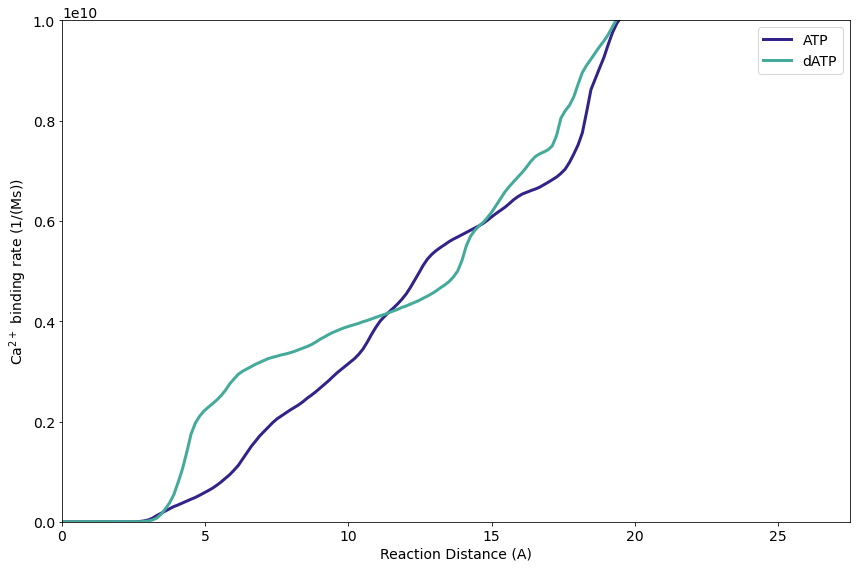

In [36]:
figure1 = plt.figure(figsize = (12,8))

plt.plot(ATP_s1_final[:,0], ATP_s1_final[:,1], color = ATP_color, linewidth = 3, label = 'ATP')
plt.plot(dATP_s1_final[:,0], dATP_s1_final[:,1], color = dATP_color, linewidth = 3, label = 'dATP')
plt.xlim(0,27.5)
plt.ylim(0,10e9)
plt.yticks(fontsize=14)
plt.legend(fontsize = 14)
plt.xticks(fontsize=14)
ax = plt.gca()

ax.yaxis.get_offset_text().set_fontsize(14)
plt.xlabel('Reaction Distance (A)', fontsize = 14)
plt.ylabel('Ca$^{2+}$ binding rate (1/(Ms))', fontsize = 14)
plt.tight_layout()

#plt.savefig('Ca_site_i.svg')

/tmp/ipykernel_9479/1787692545.py:6: RuntimeWarning: invalid value encountered in true_divide
  np.log2(np.interp(x, dATP_s1_final[:,0], dATP_s1_final[:,1])/np.interp(x, ATP_s1_final[:,0], ATP_s1_final[:,1])),
/tmp/ipykernel_9479/1787692545.py:6: RuntimeWarning: divide by zero encountered in log2
  np.log2(np.interp(x, dATP_s1_final[:,0], dATP_s1_final[:,1])/np.interp(x, ATP_s1_final[:,0], ATP_s1_final[:,1])),


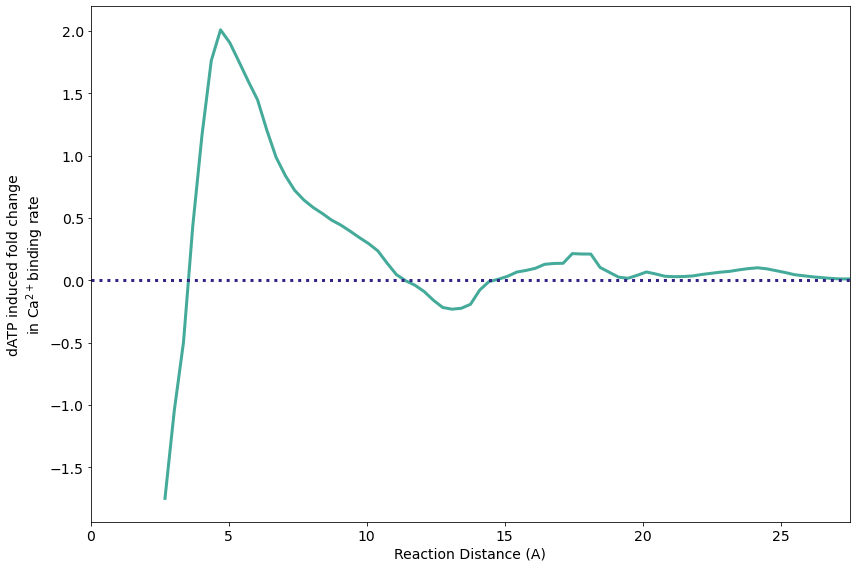

In [37]:
figure1 = plt.figure(figsize = (12,8))

start_interp = min(dATP_s1_final[:,0])
x  = np.linspace(start_interp, 50, 150)
plt.plot(x, 
         np.log2(np.interp(x, dATP_s1_final[:,0], dATP_s1_final[:,1])/np.interp(x, ATP_s1_final[:,0], ATP_s1_final[:,1])),
        color = dATP_color, linewidth = 3)
lim = plt.xlim()
plt.plot((0,60),(0,0),':', color = ATP_color, linewidth = 3)

plt.xlim(0,27.5)

plt.yticks(fontsize=14)

plt.xticks(fontsize=14)

plt.xlabel('Reaction Distance (A)', fontsize = 14)
plt.ylabel('dATP induced fold change\nin Ca$^{2+}$binding rate', fontsize = 14)
plt.tight_layout()
#plt.savefig('Change_Ca_site_i.svg')

### Site II


In [38]:
ATP_site_II_results_list = []
for i in range(30):
    a = np.loadtxt('/home/marcus/Documents/SERCA/serca-atp-datp/ca_bd/human_ATP_site_II/directory_{}/output_rates.txt'.format(i))
    ATP_site_II_results_list.append(a)
    
ATP_s2_x_range, ATP_s2_wa = calc_wa(np.array(ATP_site_II_results_list), ATP_weights)

save_name = input('Enter a filename (without extension) to save: ')
np.savetxt(save_name+'.csv', np.array((ATP_s2_x_range,ATP_s2_wa)).T)
print('Saved array ATP_s2_wa as {}'.format(save_name+'.csv'))

Enter a filename (without extension) to save: ATP_site_II
Saved array ATP_s2_wa as ATP_site_II.csv


In [39]:
dATP_site_II_results_list = []
for i in range(30):
    a = np.loadtxt('/home/marcus/Documents/SERCA/serca-atp-datp/ca_bd/human_dATP_site_II/directory_{}/output_rates.txt'.format(i))
    dATP_site_II_results_list.append(a)
    
dATP_s2_x_range, dATP_s2_wa = calc_wa(np.array(dATP_site_II_results_list), dATP_weights)

save_name = input('Enter a filename (without extension) to save: ')
np.savetxt(save_name+'.csv', np.array((dATP_s2_x_range,dATP_s2_wa)).T)
print('Saved array dATP_s2_wa as {}'.format(save_name+'.csv'))

Enter a filename (without extension) to save: dATP_site_II
Saved array dATP_s2_wa as dATP_site_II.csv


In [40]:
ATP_s2_final = np.loadtxt('ATP_site_II.csv')
dATP_s2_final = np.loadtxt('dATP_site_II.csv')

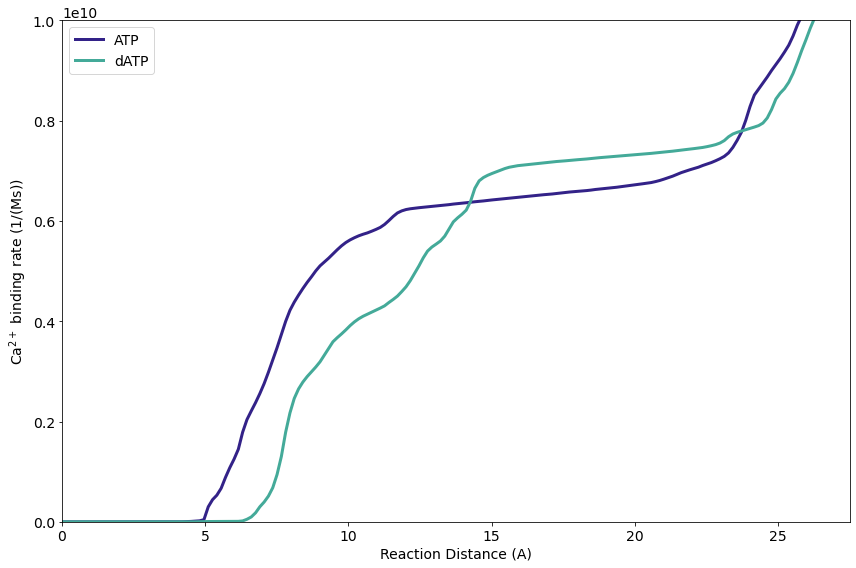

In [41]:
figure1 = plt.figure(figsize = (12,8))

plt.plot(ATP_s2_final[:,0], ATP_s2_final[:,1], color = ATP_color, linewidth = 3, label = 'ATP')
plt.plot(dATP_s2_final[:,0], dATP_s2_final[:,1], color = dATP_color, linewidth = 3, label = 'dATP')
plt.xlim(0,27.5)
plt.ylim(0,10e9)
plt.yticks(fontsize=14)
plt.legend(fontsize = 14)
plt.xticks(fontsize=14)
ax = plt.gca()

ax.yaxis.get_offset_text().set_fontsize(14)
plt.xlabel('Reaction Distance (A)', fontsize = 14)
plt.ylabel('Ca$^{2+}$ binding rate (1/(Ms))', fontsize = 14)
plt.tight_layout()

#plt.savefig('Ca_site_i.svg')

/tmp/ipykernel_9479/3408932618.py:6: RuntimeWarning: invalid value encountered in true_divide
  np.log2(np.interp(x, dATP_s2_final[:,0], dATP_s2_final[:,1])/np.interp(x, ATP_s2_final[:,0], ATP_s2_final[:,1])),
/tmp/ipykernel_9479/3408932618.py:6: RuntimeWarning: divide by zero encountered in log2
  np.log2(np.interp(x, dATP_s2_final[:,0], dATP_s2_final[:,1])/np.interp(x, ATP_s2_final[:,0], ATP_s2_final[:,1])),


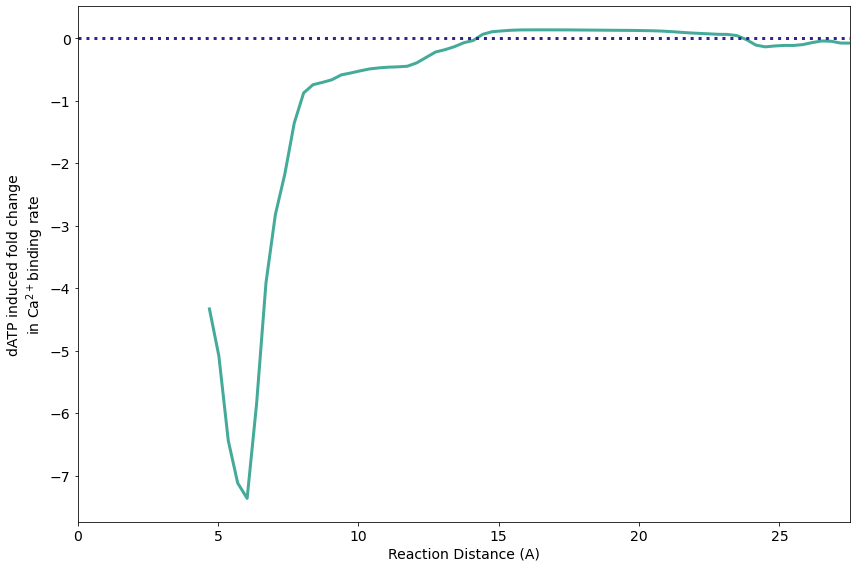

In [42]:
figure1 = plt.figure(figsize = (12,8))

start_interp = min(dATP_s2_final[:,0])
x  = np.linspace(start_interp, 50, 150)
plt.plot(x, 
         np.log2(np.interp(x, dATP_s2_final[:,0], dATP_s2_final[:,1])/np.interp(x, ATP_s2_final[:,0], ATP_s2_final[:,1])),
        color = dATP_color, linewidth = 3)
lim = plt.xlim()
plt.plot((0,60),(0,0),':', color = ATP_color, linewidth = 3)

plt.xlim(0,27.5)

plt.yticks(fontsize=14)

plt.xticks(fontsize=14)

plt.xlabel('Reaction Distance (A)', fontsize = 14)
plt.ylabel('dATP induced fold change\nin Ca$^{2+}$binding rate', fontsize = 14)
plt.tight_layout()
#plt.savefig('Change_Ca_site_i.svg')

### Machine Learning Approaches 

In [333]:
def process_for_ICA(results_list):
    n_features = 100
    new_array = np.zeros((30, n_features)) # Xarray-like of shape (n_samples, n_features)
    input_array = np.array(results_list)
    x_min = max(input_array[:,0,0]) 
    x_max = 30
    x_range = np.linspace(x_min, x_max, n_features)
    for i in range(len(results_list)):
        new_array[i,:] = np.interp(x_range, results_list[i][:,0], results_list[i][:,2]) 
        
    return new_array
        
    
    
X = process_for_ICA(results_list)

In [337]:
X.shape

(30, 100)

In [338]:
from sklearn.decomposition import FastICA

In [383]:
from sklearn.decomposition import FastICA, PCA

# Compute ICA
ica = FastICA(n_components=20, whiten="arbitrary-variance", random_state = 11)
S_ = ica.fit_transform(X)  # Reconstruct signals
A_ = ica.mixing_  # Get estimated mixing matrix

# We can `prove` that the ICA model applies by reverting the unmixing.
#assert np.allclose(X, np.dot(S_, A_.T) + ica.mean_)

# For comparison, compute PCA
pca = PCA(n_components=3)
H = pca.fit_transform(X)  # Reconstruct signals based on orthogonal components

In [384]:
S_.shape

(30, 20)

In [385]:
A_.shape

(100, 20)

In [387]:
S_.shape

(30, 20)

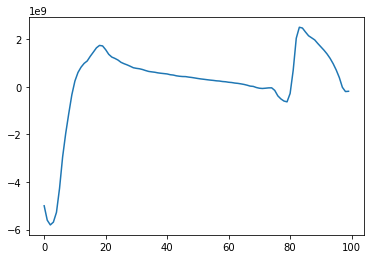

In [386]:
plt.plot(A_[:,0])

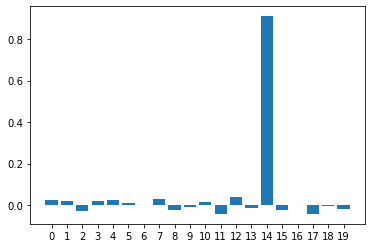

In [377]:
plt.bar(np.arange(20),S_[0,:])
plt.xticks(np.arange(20))
plt.show()

In [126]:
from sklearn import preprocessing
import numpy as np

X_scaled = preprocessing.StandardScaler().fit_transform(X)

In [128]:
from sklearn.decomposition import PCA

In [181]:
pca = PCA(n_components=20).fit(X_scaled)

In [187]:
transformed = pca.transform(X_scaled)

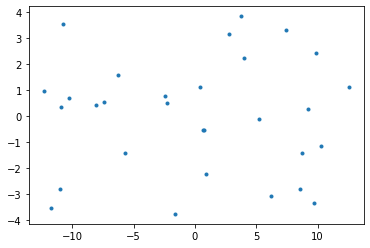

In [188]:
transformed.shape # (Samples , components) 
plt.plot(transformed[:,0], transformed[:,3],'.')

In [200]:
transformed[5]


array([ 7.39811575, -0.51846321,  3.05010571,  3.32725371, -3.04643693,
       -1.97851084, -0.85526632,  0.50399287, -0.29456678, -1.38844659,
        0.64826434,  0.49854642, -0.38280945, -0.31319139, -0.33924028,
       -0.45026205,  0.0444083 , -0.42452275, -0.3230092 , -0.04574348])

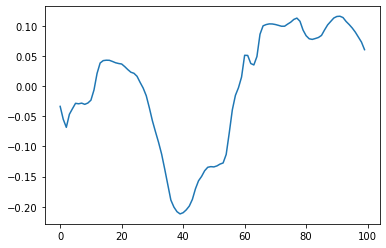

In [189]:
plt.plot(pca.components_[2])

In [192]:
np.cumsum(pca.explained_variance_ratio_)

array([0.60194835, 0.76910881, 0.83585881, 0.88292279, 0.91806483,
       0.94111451, 0.95825115, 0.96798768, 0.97403006, 0.97961179,
       0.98414683, 0.98826238, 0.99081314, 0.99278032, 0.99425896,
       0.99557034, 0.99665521, 0.9974451 , 0.99808557, 0.99852584])

<BarContainer object of 20 artists>

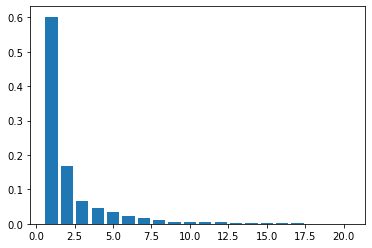

In [190]:
plt.bar(np.arange(1,21), pca.explained_variance_ratio_)

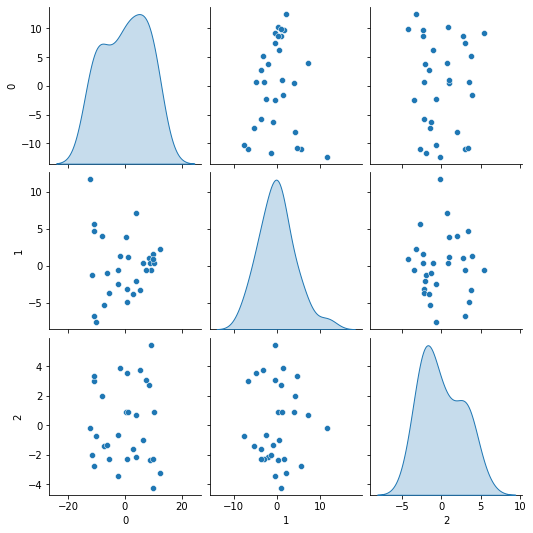

In [191]:
sns.pairplot(pd.DataFrame(transformed[:,0:3]), diag_kind="kde")

In [219]:
test = np.zeros((30,30))

for i in range(30):
    for j in range(30):
        test[i,j] = np.linalg.norm(X_scaled[i,:] - X_scaled[j,:])
        

### Site II Calcium Binding 

#### ATP

In [323]:
skip_inds = []
results_list = []
for i in range(30):
    a = np.loadtxt('/home/marcus/Documents/SERCA/serca-atp-datp/ca_bd/human_ATP_site_II/directory_{}/output_rates.txt'.format(i))
    if len(a)==0:
        print(i)
        skip_inds.append(i)
    else: 
        results_list.append(a)
        
        
ATP_cluster_df.C1.value_counts()
keep_inds = []
keep_counts = []
for i in range(30):
    if i not in skip_inds:
        print(i,dATP_cluster_df.C1.value_counts()[i])
        keep_inds.append(i)
        keep_counts.append(dATP_cluster_df.C1.value_counts()[i])
        
keep_weights = np.array(keep_counts)/sum(keep_counts)

0 3641
1 3535
2 2709
3 1590
4 1578
5 1560
6 1553
7 1345
8 1239
9 1017
10 998
11 886
12 826
13 816
14 735
15 682
16 574
17 509
18 498
19 423
20 414
21 404
22 371
23 369
24 352
25 332
26 327
27 315
28 229
29 173


In [280]:
x, wa = calc_wa(np.array(results_list), keep_weights)

In [281]:
save_name = input('Enter a filename (without extension) to save: ')

Enter a filename (without extension) to save: ATP_site_II


In [282]:
np.savetxt(save_name+'.csv', np.array((x,wa)).T)
print('Saved as {}'.format(save_name+'.csv'))

Saved as ATP_site_II.csv


#### dATP

In [325]:
skip_inds = []
results_list = []
for i in range(30):
    a = np.loadtxt('/home/marcus/Documents/SERCA/serca-atp-datp/ca_bd/human_dATP_site_II/directory_{}/output_rates.txt'.format(i))
    if len(a)==0:
        print(i)
        skip_inds.append(i)
    else: 
        results_list.append(a)
        
        
dATP_cluster_df.C1.value_counts()
keep_inds = []
keep_counts = []
for i in range(30):
    if i not in skip_inds:
        print(i,dATP_cluster_df.C1.value_counts()[i])
        keep_inds.append(i)
        keep_counts.append(dATP_cluster_df.C1.value_counts()[i])
        
keep_weights = np.array(keep_counts)/sum(keep_counts)

0 3641
1 3535
2 2709
3 1590
4 1578
5 1560
6 1553
7 1345
8 1239
9 1017
10 998
11 886
12 826
13 816
14 735
15 682
16 574
17 509
18 498
19 423
20 414
21 404
22 371
23 369
24 352
25 332
26 327
27 315
28 229
29 173


In [284]:
x, wa = calc_wa(np.array(results_list), keep_weights)

In [285]:
save_name = input('Enter a filename (without extension) to save: ')

Enter a filename (without extension) to save: dATP_site_II


In [286]:
np.savetxt(save_name+'.csv', np.array((x,wa)).T)
print('Saved as {}'.format(save_name+'.csv'))

Saved as dATP_site_II.csv


In [287]:
ATP_site_II = np.loadtxt('ATP_site_II.csv')
dATP_site_II = np.loadtxt('dATP_site_II.csv')

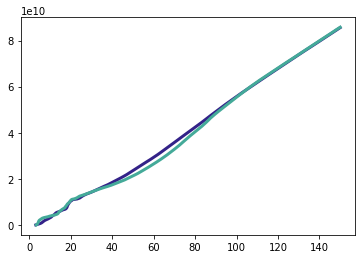

In [303]:
plt.plot(ATP_final[:,0], ATP_final[:,1], color = ATP_color, linewidth = 3, label = 'ATP')
plt.plot(dATP_final[:,0], dATP_final[:,1], color = dATP_color, linewidth = 3, label = 'dATP')

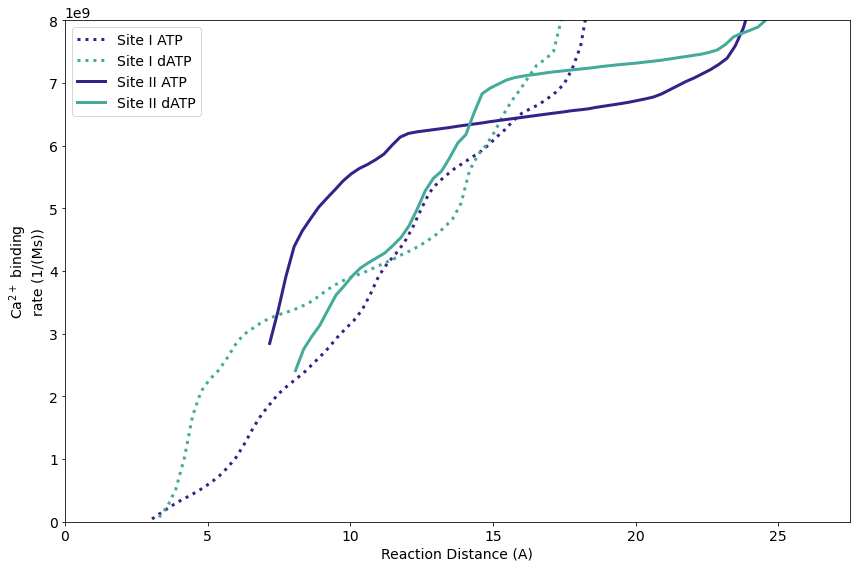

In [327]:
figure1 = plt.figure(figsize = (12,8))


plt.plot(ATP_final[:,0], ATP_final[:,1], ':',color = ATP_color, linewidth = 3, label = 'Site I ATP')
plt.plot(dATP_final[:,0], dATP_final[:,1], ':',color = dATP_color, linewidth = 3, label = 'Site I dATP')

plt.plot(ATP_site_II[:,0], ATP_site_II[:,1], color = ATP_color, linewidth = 3, label = 'Site II ATP')
plt.plot(dATP_site_II[:,0], dATP_site_II[:,1], color = dATP_color, linewidth = 3, label = 'Site II dATP')
plt.xlim(0,27.5)
plt.ylim(0,8e9)
plt.yticks(fontsize=14)
plt.legend(fontsize = 14)
plt.xticks(fontsize=14)
ax = plt.gca()
ax.yaxis.get_offset_text().set_fontsize(14)
plt.xlabel('Reaction Distance (A)', fontsize = 14)
plt.ylabel('Ca$^{2+}$ binding\nrate (1/(Ms))', fontsize = 14)
plt.tight_layout()

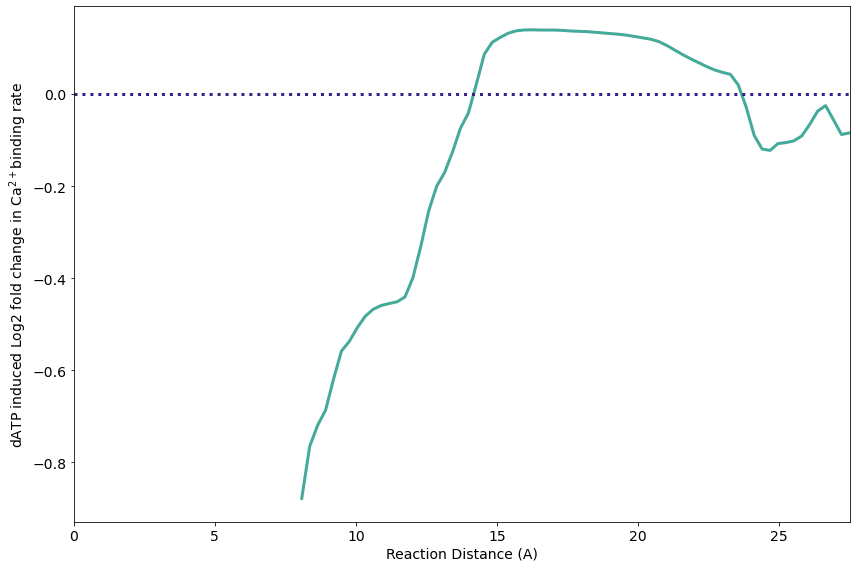

In [300]:
figure1 = plt.figure(figsize = (12,8))

start_interp = min(dATP_site_II[:,0])
x  = np.linspace(start_interp, 50, 150)
plt.plot(x, 
         np.log2(np.interp(x, dATP_site_II[:,0], dATP_site_II[:,1])/np.interp(x, ATP_site_II[:,0], ATP_site_II[:,1])),
        color = dATP_color, linewidth = 3)
lim = plt.xlim()
plt.plot((0,60),(0,0),':', color = ATP_color, linewidth = 3)

plt.xlim(0,27.5)

plt.yticks(fontsize=14)

plt.xticks(fontsize=14)

plt.xlabel('Reaction Distance (A)', fontsize = 14)
plt.ylabel('dATP induced Log2 fold change in Ca$^{2+}$binding rate', fontsize = 14)
plt.tight_layout()
#plt.savefig('Change_Ca_site_i.svg')